In [48]:
import os

import torch
import pandas as pd
import plotnine as pn

import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")
from misc.tools import random_stochastic_matrix, normalize_rows
from game.perception import generate_sim_matrix, generate_dist_matrix
from misc.util import encoders_to_df
from misc.vis import basic_encoder_heatmap

In [49]:
torch.set_printoptions(sci_mode=False)

In [54]:
u = 3 # world states
m = 2 # meaning distributions
shape = (m, u)

universe = list(range(u))
dist = generate_dist_matrix(universe)
sim = generate_sim_matrix(universe, 1e0, dist) # (u, u) matrix

print(sim)

# NOTE: How should we construct the (m, u) matrix? 
# In general this is a deep empirical question about what the categories are that humans form to represent a domain. 
# The answer essentially tells us what the unsupervised classification/clustering algorithm is for humans/agents for a particular domain, which is nontrivial to obtain.

# When m = u, modeling is easy, and we can make the simplifying assumption of creating a similarity based matrix, and since there's no information loss from u to m, we don't need to make a decision about how to cluster objects into meanings.

# M = random_stochastic_matrix(shape, 1e0)
# M = torch.Tensor([[0.5, 0.3, 0.2], [0., 0.1, 0.9]])
M = normalize_rows(sim)
print()

print(M)
print(M.T)
print()

print(M @ M.T)
print(normalize_rows(M @ M.T))

tensor([[1.0000, 0.3679, 0.0183],
        [0.3679, 1.0000, 0.3679],
        [0.0183, 0.3679, 1.0000]])

tensor([[0.7214, 0.2654, 0.0132],
        [0.2119, 0.5761, 0.2119],
        [0.0132, 0.2654, 0.7214]])
tensor([[0.7214, 0.2119, 0.0132],
        [0.2654, 0.5761, 0.2654],
        [0.0132, 0.2119, 0.7214]])

tensor([[0.5910, 0.3086, 0.0895],
        [0.3086, 0.4217, 0.3086],
        [0.0895, 0.3086, 0.5910]])
tensor([[0.5975, 0.3120, 0.0905],
        [0.2970, 0.4059, 0.2970],
        [0.0905, 0.3120, 0.5975]])


In [51]:
heatmap = lambda enc: basic_encoder_heatmap(encoders_to_df(torch.stack([enc])))

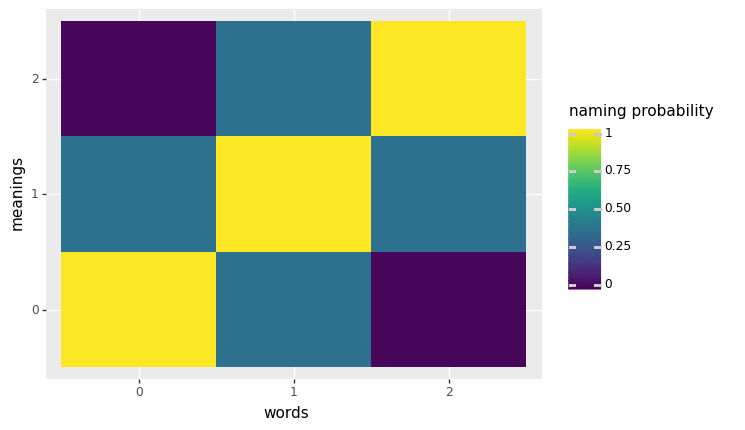

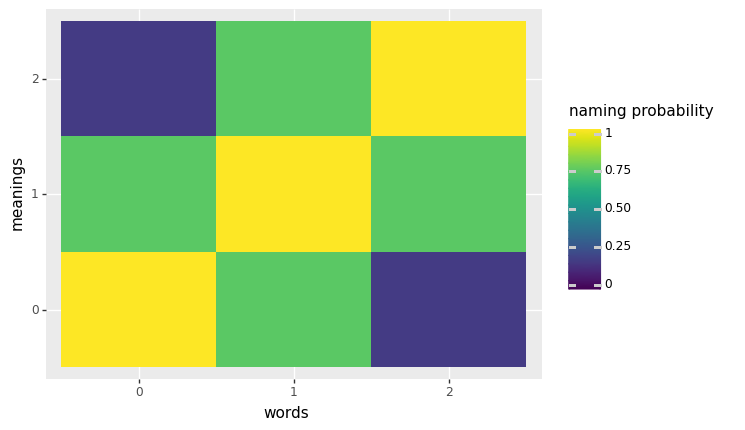

In [52]:
print(heatmap(M))
print(heatmap(M @ M.T))